# 다항회귀분석

피쳐들(독립변수)과 레이블(종속변수)이 2차 함수 이상의 관계를 가지는 것으로 곡선이나 좀 더 복잡한 모양을 표현하는 것이 가능

## 피쳐들(독립변수)의 차수를 높이는 형태

다항회귀 역시 선형회귀로 간주 되는데 선형회귀의 정의가 단순히 직선이나 곡선과 같은 모양에 있는 것이 아니라 가중치와 피쳐들의 선형 결합에 있기 때문

다항회귀는 별도의 알고리즘이 있는 것이 아니라 피쳐들을 제곱, 서로 곱한 값 등 좀 더 복잡한 값으로 만들어 선형회귀에 넣어서 학습시킴

sicikit-learn에서는  PolynomialFeatures 클래스로 원본 단항 Feature들을 다항 Feature들로 변환한 데이터 세트에 LinearRegression 객체를 적용하는 것으로 다항 회귀 기능 제공

## #01. 작업준비

### 패키지 가져오기

In [1]:
import sys

sys.path.append("../../")
import helper

import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### 그래프 한글 설정

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 자동차의 속도(speed)에 따른 제동거리(dist) 예측

### 데이터 가져오기

In [3]:
origin = read_excel("https://data.hossam.kr/E04/cars.xlsx")
origin.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


### 데이터 전처리

#### 0차항(1)을 포함하는 2차식으로 변환

`PolynomialFeatures`클래스를 사용하여 $y = ax + b$ 라는 회귀식을 $y = ax^2 + bx + c$ 형태로 바꾼다.

- degree : 변환할 차수 (기본값=2)
- include_bias : True인 경우 0차항(1)도 함께 생성한다. (기본값=True)

In [4]:
poly = PolynomialFeatures(degree=2, include_bias=True)
fit = poly.fit_transform(origin[['speed']])
fit

array([[  1.,   4.,  16.],
       [  1.,   4.,  16.],
       [  1.,   7.,  49.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  10., 100.],
       [  1.,  10., 100.],
       [  1.,  11., 121.],
       [  1.,  11., 121.],
       [  1.,  12., 144.],
       [  1.,  12., 144.],
       [  1.,  12., 144.],
       [  1.,  12., 144.],
       [  1.,  13., 169.],
       [  1.,  13., 169.],
       [  1.,  13., 169.],
       [  1.,  13., 169.],
       [  1.,  14., 196.],
       [  1.,  14., 196.],
       [  1.,  14., 196.],
       [  1.,  14., 196.],
       [  1.,  15., 225.],
       [  1.,  15., 225.],
       [  1.,  15., 225.],
       [  1.,  16., 256.],
       [  1.,  16., 256.],
       [  1.,  17., 289.],
       [  1.,  17., 289.],
       [  1.,  17., 289.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,  18., 324.],
       [  1.,  19., 361.],
       [  1.,  19., 361.],
 

#### 생성된 피처의 이름 확인

In [5]:
poly.get_feature_names_out()

array(['1', 'speed', 'speed^2'], dtype=object)

#### 0차항(1)을 포함하지 않는 2차식으로 변환(권장)

In [6]:
poly = PolynomialFeatures(include_bias=False)
fit = poly.fit_transform(origin[['speed']])
fit

array([[  4.,  16.],
       [  4.,  16.],
       [  7.,  49.],
       [  7.,  49.],
       [  8.,  64.],
       [  9.,  81.],
       [ 10., 100.],
       [ 10., 100.],
       [ 10., 100.],
       [ 11., 121.],
       [ 11., 121.],
       [ 12., 144.],
       [ 12., 144.],
       [ 12., 144.],
       [ 12., 144.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 13., 169.],
       [ 14., 196.],
       [ 14., 196.],
       [ 14., 196.],
       [ 14., 196.],
       [ 15., 225.],
       [ 15., 225.],
       [ 15., 225.],
       [ 16., 256.],
       [ 16., 256.],
       [ 17., 289.],
       [ 17., 289.],
       [ 17., 289.],
       [ 18., 324.],
       [ 18., 324.],
       [ 18., 324.],
       [ 18., 324.],
       [ 19., 361.],
       [ 19., 361.],
       [ 19., 361.],
       [ 20., 400.],
       [ 20., 400.],
       [ 20., 400.],
       [ 20., 400.],
       [ 20., 400.],
       [ 22., 484.],
       [ 23., 529.],
       [ 24., 576.],
       [ 24., 576.],
       [ 24.,

#### 생성된 피처의 이름 확인

In [7]:
poly.get_feature_names_out()

array(['speed', 'speed^2'], dtype=object)

#### 데이터프레임으로 재구성

In [8]:
x = DataFrame(fit, columns=poly.get_feature_names_out())
x.head()

,speed,speed^2
0,4.0,16.0
1,4.0,16.0
2,7.0,49.0
3,7.0,49.0
4,8.0,64.0


#### 종속변수만 추출한 데이터 프레임

In [9]:
y = origin[['dist']]
y.head()

,dist
0,2
1,10
2,4
3,22
4,16


#### 테스트 데이터와 검증 데이터로 분리

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35, 2), (15, 2), (35, 1), (15, 1))

### 회귀분석 수행

데이터 표본수(`35`)가 작기 때문에 과적합이 발생하지만 예제 데이터셋이므로 과적합은 무시하고 진행하도록 한다.

In [11]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

계수:  [[0.73773403 0.09986278]]
절편:  [4.70067321]
훈련 데이터 설명력:  0.5941347702404498
검증 데이터 설명력:  0.818350403785495


### 회귀식 추정

In [12]:
feature_names = x.columns
#print(feature_names)

expr = []
for i, v in enumerate(feature_names):
    expr.append("%f x %s" % (fit.coef_[0][i], v))
    
expr = " + ".join(expr)
expr = "y = " + expr + " + %f" % fit.intercept_[0]
expr

'y = 0.737734 x speed + 0.099863 x speed^2 + 4.700673'

### 예측값 생성

#### 훈련 데이터에 대한 예측값

In [13]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([ 9.24941376, 22.06429118, 42.06928848, 85.55825922, 38.23580838,
       50.33542533, 31.16802484, 54.76808209, 42.06928848, 22.06429118,
       34.60205383, 79.92724915, 14.75808748, 38.23580838, 74.49596463,
       16.99376316, 31.16802484, 54.76808209, 27.9337214 , 69.26440567,
       38.23580838, 54.76808209, 59.40046439, 24.89914351, 50.33542533,
       50.33542533, 34.60205383, 59.40046439, 34.60205383, 31.16802484,
       59.40046439, 50.33542533, 46.10249413, 14.75808748, 79.92724915])

#### 검증 데이터에 대한 예측값

In [14]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([24.89914351, 27.9337214 , 46.10249413, 79.92724915, 31.16802484,
        9.24941376, 59.40046439, 27.9337214 , 46.10249413, 22.06429118,
       34.60205383, 79.92724915, 27.9337214 , 59.40046439, 19.42916439])

### 학습 결과 시각화

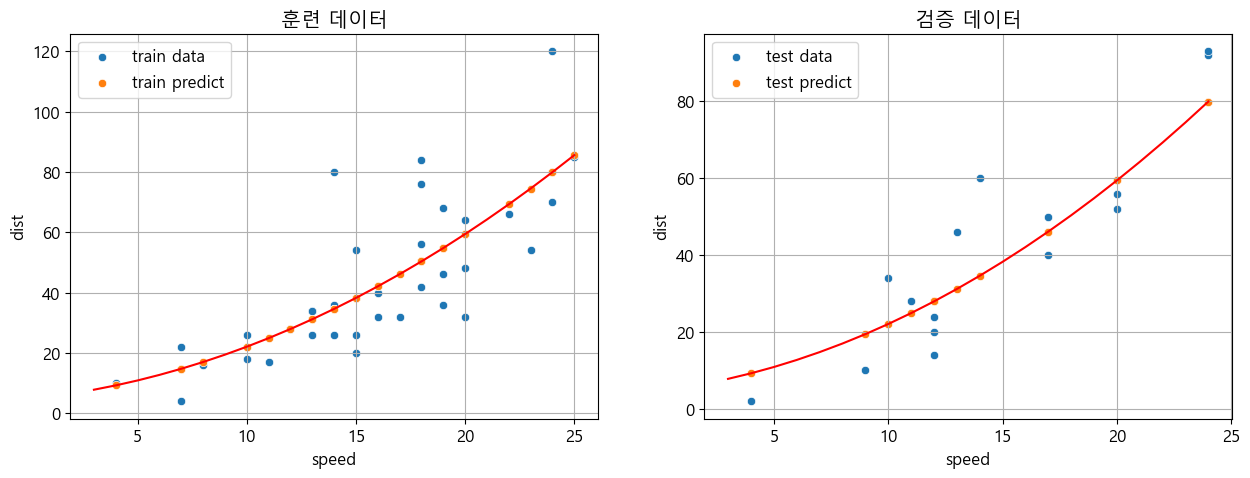

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 학습에 사용한 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_train['speed'], y=y_train['dist'], label='train data', ax=ax1)
sb.scatterplot(x=x_train['speed'], y=y_train_pred, label='train predict', ax=ax1)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax1.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)
# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()


# 검증용 데이터와 예측값의 차이를 시각화
sb.scatterplot(x=x_test['speed'], y=y_test['dist'], label='test data', ax=ax2)
sb.scatterplot(x=x_test['speed'], y=y_test_pred, label='test predict', ax=ax2)

# 그래프가 그려진 범위 안에서 1씩 증가하는 좌표를 생성
xmin, xmax = ax2.get_xlim()
xrange = np.arange(xmin.round(), xmax.round(), 1)

# y값에 대한 추정치를 계산
y_pred = xrange * fit.coef_[0][0] + xrange**2 * fit.coef_[0][1] + fit.intercept_[0]

# 추세선
sb.lineplot(x=xrange, y=y_pred, color='red', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

## #03. 농어의 크기에 따른 무게 예측

### 데이터 가져오기

In [16]:
origin = read_excel("https://data.hossam.kr/F02/fish2.xlsx")
origin.head()

,길이,높이,두께,무게
0,8.4,2.11,1.41,5.9
1,13.7,3.53,2.00,32.0
2,15.0,3.82,2.43,40.0
3,16.2,4.59,2.63,51.5
4,17.4,4.59,2.94,70.0


### 데이터 전처리

#### 다항식으로 변환하기

In [17]:
poly = PolynomialFeatures(degree=2, include_bias=False)
fit = poly.fit_transform(origin[['길이', '높이', '두께']])
x = DataFrame(fit, columns=poly.get_feature_names_out())
x.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,8.4,2.11,1.41,70.56,17.724,11.844,4.4521,2.9751,1.9881
1,13.7,3.53,2.00,187.69,48.361,27.400,12.4609,7.0600,4.0000
2,15.0,3.82,2.43,225.00,57.300,36.450,14.5924,9.2826,5.9049
3,16.2,4.59,2.63,262.44,74.358,42.606,21.0681,12.0717,6.9169
4,17.4,4.59,2.94,302.76,79.866,51.156,21.0681,13.4946,8.6436


#### 모듈 기능을 활용한 다항식 변환

In [18]:
x = helper.convertPoly(origin[['길이', '높이', '두께']])
x.head()

,길이,높이,두께,길이^2,길이 높이,길이 두께,높이^2,높이 두께,두께^2
0,8.4,2.11,1.41,70.56,17.724,11.844,4.4521,2.9751,1.9881
1,13.7,3.53,2.00,187.69,48.361,27.400,12.4609,7.0600,4.0000
2,15.0,3.82,2.43,225.00,57.300,36.450,14.5924,9.2826,5.9049
3,16.2,4.59,2.63,262.44,74.358,42.606,21.0681,12.0717,6.9169
4,17.4,4.59,2.94,302.76,79.866,51.156,21.0681,13.4946,8.6436


#### 훈련 데이터와 검증 데이터로 분리

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, origin[['무게']], test_size=0.3, random_state=123)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((39, 9), (17, 9), (39, 1), (17, 1))

### 회귀분석 수행

In [20]:
model = LinearRegression()
fit = model.fit(x_train, y_train)

print("계수: ", fit.coef_)
print("절편: ", fit.intercept_)
print("훈련 데이터 설명력: ", fit.score(x_train, y_train))
print("검증 데이터 설명력: ", fit.score(x_test, y_test))

계수:  [[  37.41440758 -122.88132493  -97.18063962   -6.02888567    6.3426341
    55.66996142   49.79134062 -170.93573464   -6.00162745]]
절편:  [47.16932806]
훈련 데이터 설명력:  0.9902576456970866
검증 데이터 설명력:  0.9004397794100227


#### 회귀식 추정

In [21]:
feature_names = x.columns

expr = []
for i, v in enumerate(feature_names):
    expr.append(f"{round(fit.coef_[0][i], 2)} * {v}")
    
expr = " + ".join(expr)
expr = f"y = {expr} + {round(fit.intercept_[0], 2)}"
expr

'y = 37.41 * 길이 + -122.88 * 높이 + -97.18 * 두께 + -6.03 * 길이^2 + 6.34 * 길이 높이 + 55.67 * 길이 두께 + 49.79 * 높이^2 + -170.94 * 높이 두께 + -6.0 * 두께^2 + 47.17'

### 예측값 생성

#### 훈련 데이터에 대한 예측값

In [22]:
y_train_pred = fit.predict(x_train)
y_train_pred = y_train_pred.reshape(-1)
y_train_pred

array([ 128.33370832,  883.83256839,  283.87720565,   21.77799523,
         75.83145366,  216.99327745,  938.39657569,  836.74358002,
        236.24624195, 1059.06921078,  222.57260812,  131.1820701 ,
        520.06151948,  879.22572679,   85.49063898,  169.39734992,
       1091.11155683,   38.96295379,   67.97550628,  131.18728322,
        869.36496752,  301.47510957,  126.61679479,  914.5832725 ,
        165.44141159,  671.60388692, 1044.70953338,   52.54927901,
        234.12069536,  270.70141026,  172.25433459,  691.90023498,
        140.65938096,  128.43625012,  587.73188249,  259.38435621,
        223.86802028,   43.34167721,  704.4884716 ])

#### 검증 데이터에 대한 예측값

In [23]:
y_test_pred = fit.predict(x_test)
y_test_pred = y_test_pred.reshape(-1)
y_test_pred

array([ 201.35925469,  131.74411912,  764.54132634,  201.37347997,
        660.89831696,  141.00557179, 1019.15355072,  285.76056495,
        438.67935317,  141.57027174,  688.68240944,  112.87613858,
         12.7130393 ,   54.17763473,  122.18773841,  153.76869217,
         82.44640206])

### 학습결과 시각화

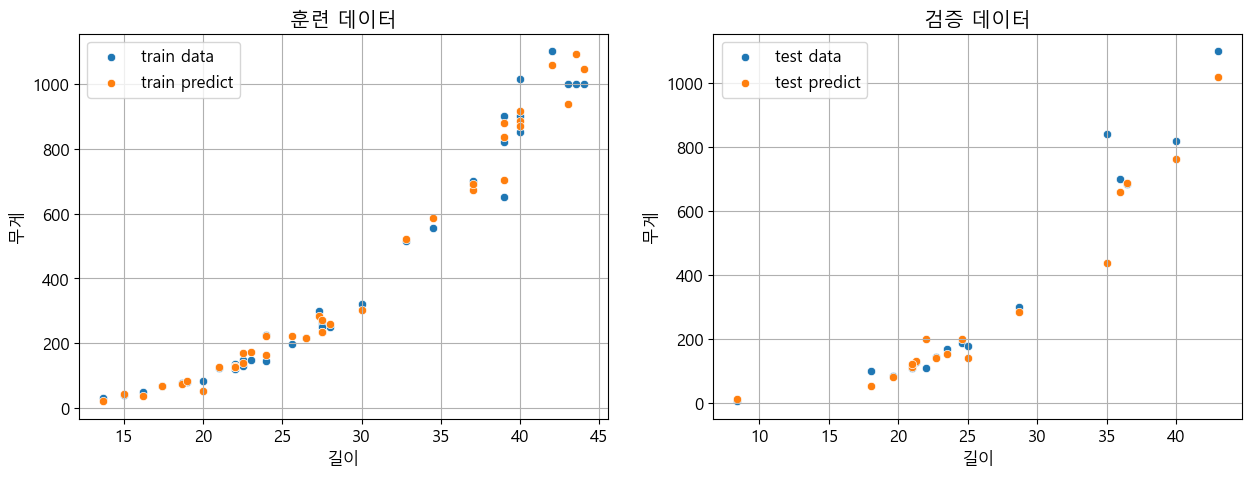

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sb.scatterplot(x=x_train['길이'], y=y_train['무게'], label='train data', ax=ax1)
sb.scatterplot(x=x_train['길이'], y=y_train_pred, label='train predict', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()

sb.scatterplot(x=x_test['길이'], y=y_test['무게'], label='test data', ax=ax2)
sb.scatterplot(x=x_test['길이'], y=y_test_pred, label='test predict', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

### 길이에 따른 무게에 대한 추세선

seaborn의 `regplot` 함수는 직선 형태의 추세선만 제공하기 때문에 2차식을 표현하는 추세선은 직접 구현해야 함

#### x변수

In [25]:
x = x_train['길이']
x

12    21.0
47    40.0
30    27.3
1     13.7
6     18.7
29    26.5
52    43.0
44    39.0
31    27.5
51    42.0
24    24.0
15    22.0
37    32.8
46    39.0
7     19.0
20    22.5
54    43.5
3     16.2
4     17.4
16    22.0
48    40.0
36    30.0
14    22.0
49    40.0
25    24.0
43    37.0
55    44.0
9     20.0
32    27.5
33    27.5
22    23.0
42    37.0
19    22.5
17    22.0
38    34.5
34    28.0
28    25.6
2     15.0
45    39.0
Name: 길이, dtype: float64

#### y축 변수

In [26]:
y = y_train['무게']
y

12     125.0
47     850.0
30     300.0
1       32.0
6       78.0
29     218.0
52    1000.0
44     900.0
31     260.0
51    1100.0
24     225.0
15     120.0
37     514.0
46     820.0
7       80.0
20     150.0
54    1000.0
3       51.5
4       70.0
16     130.0
48     900.0
36     320.0
14     120.0
49    1015.0
25     145.0
43     690.0
55    1000.0
9       85.0
32     265.0
33     250.0
22     150.0
42     700.0
19     130.0
17     135.0
38     556.0
34     250.0
28     197.0
2       40.0
45     650.0
Name: 무게, dtype: float64

#### x에 따라 y값이 변하는 2차 방정식 생성

In [27]:
coeff = np.polyfit(x, y, 2)
coeff

array([  1.07216532, -26.13632664, 185.41739846])

#### 평면좌표 상에서의 가상의 x값 생성

In [28]:
Vtrand = np.linspace(x.min(), x.max(), 100)
Vtrand

array([13.7       , 14.00606061, 14.31212121, 14.61818182, 14.92424242,
       15.23030303, 15.53636364, 15.84242424, 16.14848485, 16.45454545,
       16.76060606, 17.06666667, 17.37272727, 17.67878788, 17.98484848,
       18.29090909, 18.5969697 , 18.9030303 , 19.20909091, 19.51515152,
       19.82121212, 20.12727273, 20.43333333, 20.73939394, 21.04545455,
       21.35151515, 21.65757576, 21.96363636, 22.26969697, 22.57575758,
       22.88181818, 23.18787879, 23.49393939, 23.8       , 24.10606061,
       24.41212121, 24.71818182, 25.02424242, 25.33030303, 25.63636364,
       25.94242424, 26.24848485, 26.55454545, 26.86060606, 27.16666667,
       27.47272727, 27.77878788, 28.08484848, 28.39090909, 28.6969697 ,
       29.0030303 , 29.30909091, 29.61515152, 29.92121212, 30.22727273,
       30.53333333, 30.83939394, 31.14545455, 31.45151515, 31.75757576,
       32.06363636, 32.36969697, 32.67575758, 32.98181818, 33.28787879,
       33.59393939, 33.9       , 34.20606061, 34.51212121, 34.81

#### 생성된 x값에 따른 y값 만들기

In [29]:
Ttrand = coeff[0] * Vtrand**2 + coeff[1] * Vtrand + coeff[2]
Ttrand

array([  28.5844326 ,   29.67680903,   30.97005155,   32.46416016,
         34.15913486,   36.05497564,   38.15168251,   40.44925547,
         42.94769451,   45.64699964,   48.54717086,   51.64820817,
         54.95011156,   58.45288104,   62.1565166 ,   66.06101826,
         70.166386  ,   74.47261982,   78.97971974,   83.68768574,
         88.59651783,   93.706216  ,   99.01678027,  104.52821062,
        110.24050705,  116.15366958,  122.26769819,  128.58259289,
        135.09835367,  141.81498054,  148.7324735 ,  155.85083255,
        163.17005768,  170.6901489 ,  178.41110621,  186.33292961,
        194.45561909,  202.77917466,  211.30359631,  220.02888405,
        228.95503788,  238.0820578 ,  247.40994381,  256.9386959 ,
        266.66831407,  276.59879834,  286.73014869,  297.06236513,
        307.59544766,  318.32939627,  329.26421097,  340.39989176,
        351.73643864,  363.2738516 ,  375.01213065,  386.95127578,
        399.091287  ,  411.43216431,  423.97390771,  436.71651

#### 확인

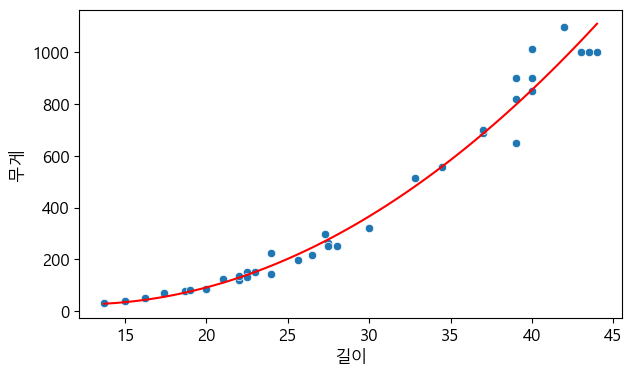

In [30]:
plt.figure(figsize=(7, 4))
sb.scatterplot(x=x_train['길이'], y=y_train['무게'])
sb.lineplot(x=Vtrand, y=Ttrand, color='red')
plt.show()
plt.close()

### 모듈에 구현해 둔 추세선 생성 함수 활용

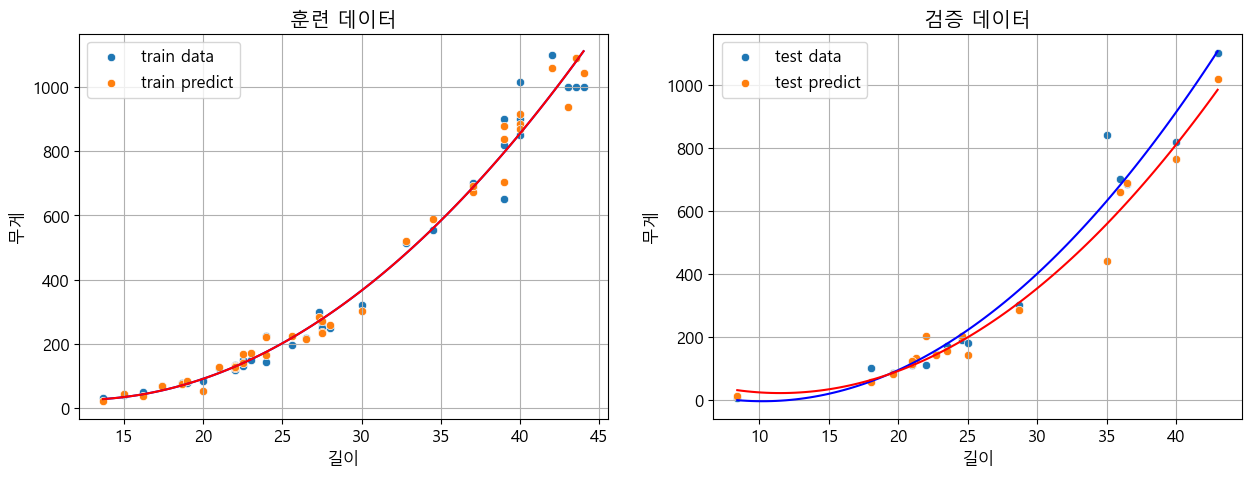

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 학습에 사용한 관측치 시각화
sb.scatterplot(x=x_train['길이'], y=y_train['무게'], label='train data', ax=ax1)

# 학습에 사용한 데이터에 추세선
x, y = helper.getTrend(x_train['길이'], y_train['무게'])
sb.lineplot(x=x, y=y, color='blue', ax=ax1)

# 학습 데이터에 따른 추정치
sb.scatterplot(x=x_train['길이'], y=y_train_pred, label='train predict', ax=ax1)

# 추정치에 대한 추세선
x, y = helper.getTrend(x_train['길이'], y_train_pred)
sb.lineplot(x=x, y=y, color='red', ax=ax1)

ax1.set_title("훈련 데이터")
ax1.legend()
ax1.grid()

# 검증데이터 시각화
sb.scatterplot(x=x_test['길이'], y=y_test['무게'], label='test data', ax=ax2)

# 검증데이터의 추세선
x, y = helper.getTrend(x_test['길이'], y_test['무게'])
sb.lineplot(x=x, y=y, color='blue', ax=ax2)

# 검증데이터에 대한 추정치 시각화
sb.scatterplot(x=x_test['길이'], y=y_test_pred, label='test predict', ax=ax2)

# 검증데이터 추정치에 대한 추세선
x, y = helper.getTrend(x_test['길이'], y_test_pred)
sb.lineplot(x=x, y=y, color='red', ax=ax2)

ax2.set_title("검증 데이터")
ax2.legend()
ax2.grid()

plt.show()
plt.close()

### 회귀분석 학습결과 그래프 모듈 기능 활용

#### 훈련데이터에 대한 단일 그래프

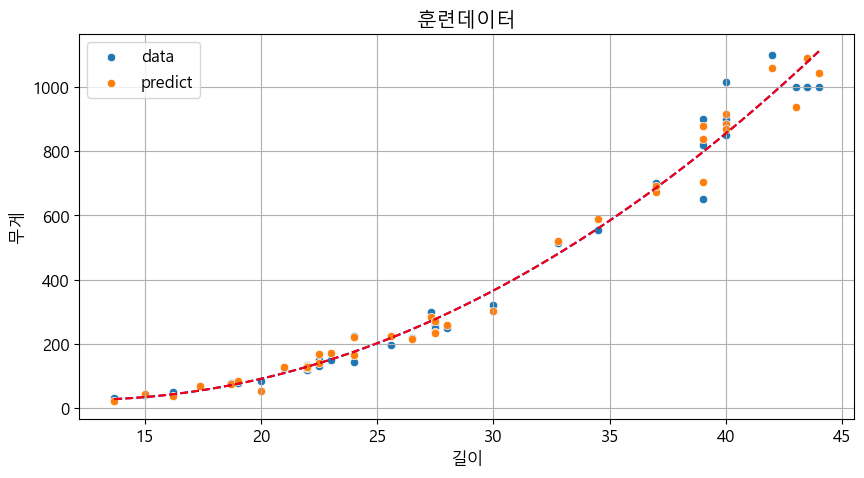

In [32]:
helper.regplot(x_train['길이'], y_train['무게'], y_train_pred, "훈련데이터", figsize=(10, 5))

#### 검증데이터에 대한 단일 그래프

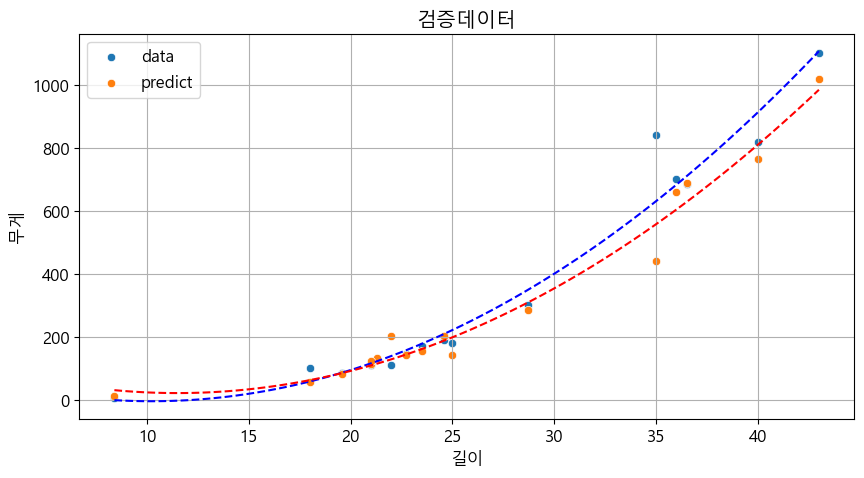

In [33]:
helper.regplot(x_test['길이'], y_test['무게'], y_test_pred, "검증데이터", figsize=(10, 5))

#### 훈련,검증 데이터에 대한 서브 플롯

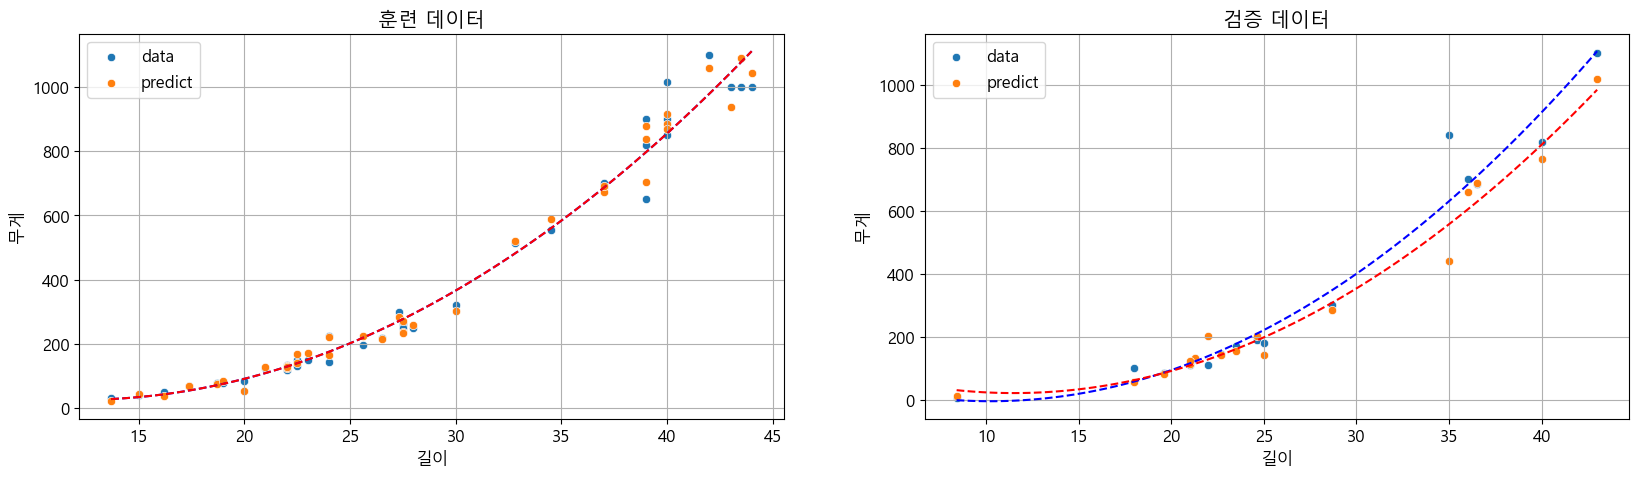

In [34]:
helper.regplot(x_train['길이'], y_train['무게'], y_train_pred, "훈련 데이터", 
               x_test['길이'], y_test['무게'], y_test_pred, "검증 데이터", 
               figsize=(20, 5), save_path="다항회귀.png")